In [28]:
# Cargar Dataset
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Para reportes de clasificación
from sklearn.metrics import classification_report
# Matrices de confsion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Guardamos el frame
df = pd.DataFrame(X, columns=iris.feature_names)
print("Antes: \n", df)

# Para prerpocesar. Primeramente escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para mejor visualización
X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)

# Mostrar primeras filas después de estandarizar
print("\nDespués de estandarizar:")
print(X_scaled_df.head())

Antes: 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Después de estandarizar:
   se

/home/alan/coding/gitRepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alan/coding/gitRepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alan/coding/gitRepos/Python/Sistemas Inteligentes/venv/lib/python3.11/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^

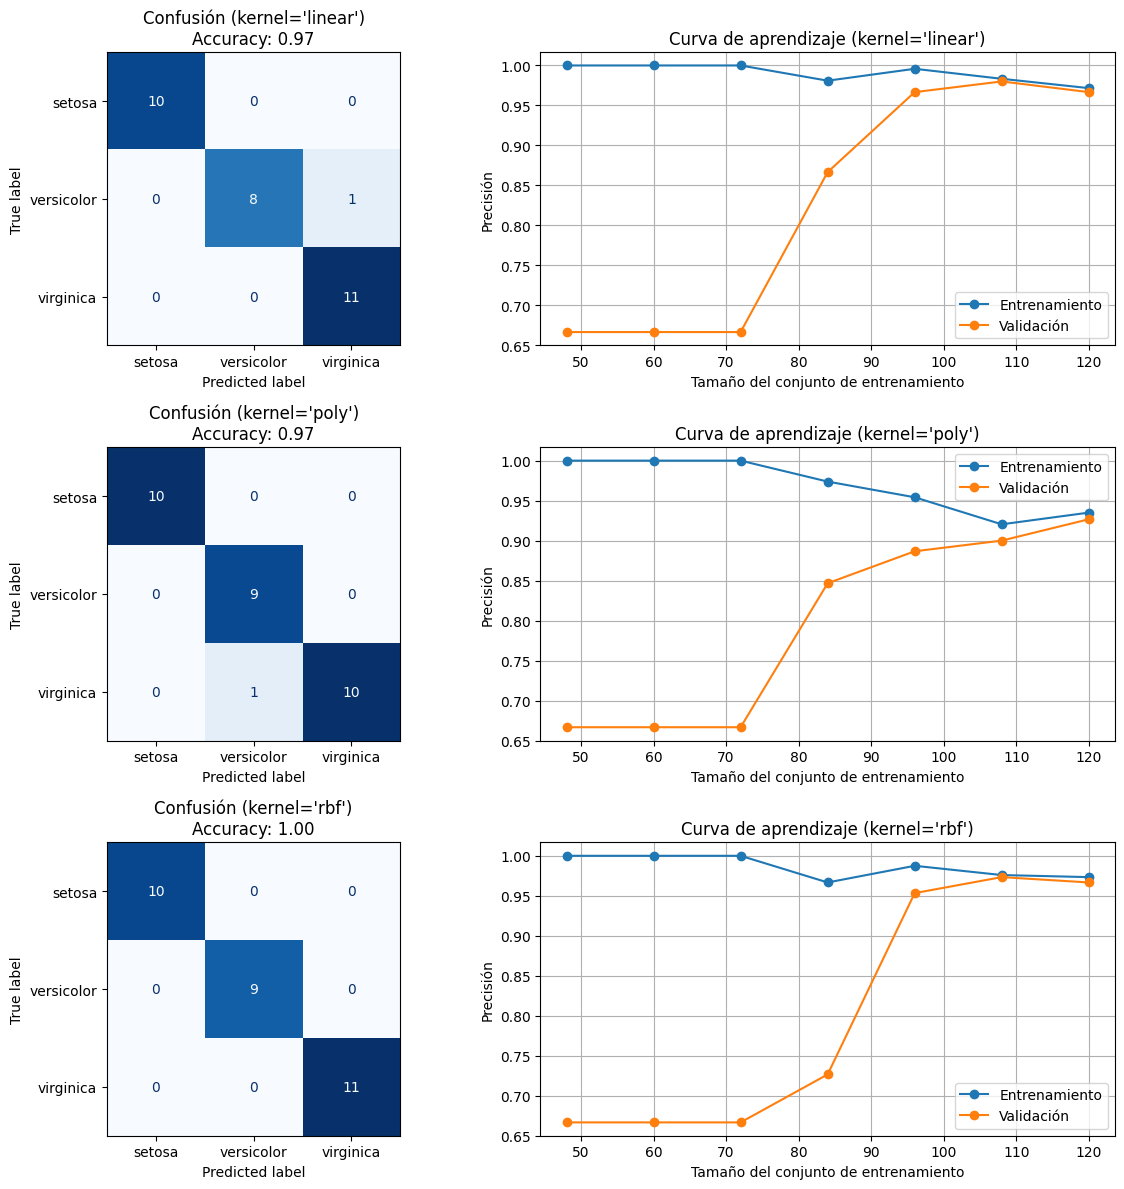

In [30]:
# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# 4. Definir kernels a evaluar
kernels = ['linear', 'poly', 'rbf']

# 5. Inicializar figura
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, kernel in enumerate(kernels):
    # Entrenar modelo
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(ax=axes[i, 0], cmap='Blues', colorbar=False)
    acc = accuracy_score(y_test, y_pred)
    axes[i, 0].set_title(f"Confusión (kernel='{kernel}')\nAccuracy: {acc:.2f}")

    # Curva de aprendizaje
    train_sizes, train_scores, val_scores = learning_curve(
        SVC(kernel=kernel), X_scaled, y, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    axes[i, 1].plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
    axes[i, 1].plot(train_sizes, val_mean, 'o-', label='Validación')
    axes[i, 1].set_title(f"Curva de aprendizaje (kernel='{kernel}')")
    axes[i, 1].set_xlabel("Tamaño del conjunto de entrenamiento")
    axes[i, 1].set_ylabel("Precisión")
    axes[i, 1].legend()
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


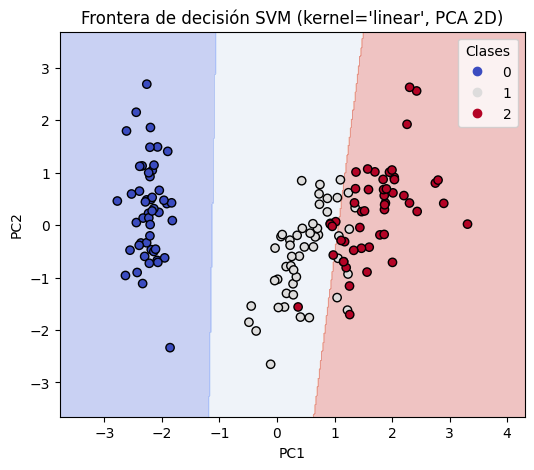

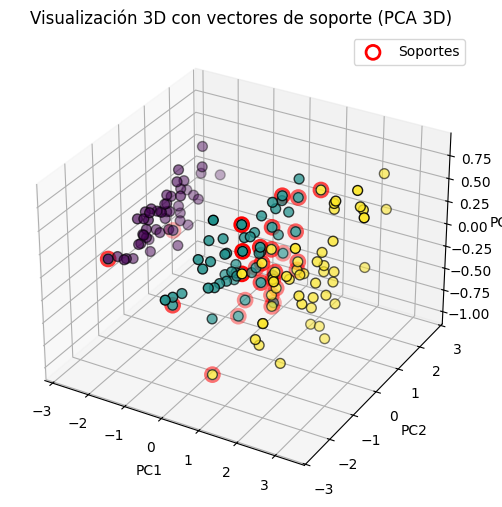

In [31]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Necesario para 3D en matplotlib

# Reducir a 2D para visualización de frontera de decisión
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Usar un modelo con kernel lineal para ilustrar vectores de soporte
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_2d, y)

# 1. Visualización 2D: Frontera de decisión
def plot_decision_boundary_2d(model, X, y):
    h = .02  # paso del grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Frontera de decisión SVM (kernel='linear', PCA 2D)")
    plt.legend(*scatter.legend_elements(), title="Clases")
    plt.show()

plot_decision_boundary_2d(svm_2d, X_2d, y)

# 2. Visualización 3D: Datos + vectores de soporte
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X_scaled)

svm_3d = SVC(kernel='linear')
svm_3d.fit(X_3d, y)

support_vectors_3d = svm_3d.support_vectors_

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='viridis', s=50, edgecolor='k')
ax.scatter(support_vectors_3d[:, 0], support_vectors_3d[:, 1], support_vectors_3d[:, 2],
           s=100, facecolors='none', edgecolors='r', linewidths=2, label='Soportes')

ax.set_title("Visualización 3D con vectores de soporte (PCA 3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()
